In [1]:
import numpy as np
import Toolbox as tb
import matplotlib.pyplot as plt

$$
STEP:average\;three-point\;data\;with\;different\;moments
$$

In [2]:
def three_pt_file_name(kappa_l,kappa_s,s_l,k_h,g_k,tau_e,g_h,p_e,p_m):
    return ("3pt_data/correlator-kl-"
                + kappa_l + "-ks-"
                + kappa_s + "-"
                + s_l + "-kh-"
                + k_h + "-"
                + g_k + "-"
                + "tau_e-" + str(tau_e) + "-"
                + g_h
                + "-pe-"
                + str(p_e[0])
                + str(p_e[1])
                + str(p_e[2])
                + "-pm-"
                + str(p_m[0])
                + str(p_m[1])
                + str(p_m[2])+".dat")

In [3]:
gamma_k = ["7","15"]
gamma_h = ["ge-14-gm-13","ge-13-gm-14"]
kappa_l = "0.136981"
kappa_s = "0.136409"
kappa_h = ["0.104000"]
kaon = ["l-s","s-l"]
tau_e_max = 16
tau_e_min = 4
tau_e_sep = 2 
###
all_p = [
    [ 0, 0,-1],
    [-1, 0, 1],
    [ 1, 0, 1],
    [ 0, 1, 1],
    [ 0,-1, 1],
]
###
three_pt_data = np.zeros((len(range(tau_e_min,tau_e_max+tau_e_sep,tau_e_sep))
                         ,len(kappa_h)
                         ,len(gamma_k)
                         ,len(gamma_h)
                         ,len(kaon)
                         ,4
                         ,2
                         ,2)).tolist()
###
for i_kh, k_h in enumerate(kappa_h):
    for i_te, tau_e in enumerate(range(tau_e_min,tau_e_max+tau_e_sep,tau_e_sep)):
        for i_gk, g_k in enumerate(gamma_k):
            for i_sl, s_l in enumerate(kaon):
                for i_gh, g_h in enumerate(gamma_h):
                    for i_inv, inv in enumerate([1,-1]):
                        p = inv*np.array(all_p)
                        p1 = p[0]
                        for i_p, p2 in enumerate(p[1:]):
                            for swap in range(2):
                                if swap == 0:
                                    p_e = p1
                                    p_m = p2
                                if swap == 1:
                                    p_e = p2
                                    p_m = p1
                                three_pt_data[i_te] [i_kh] [i_gk] [i_gh] [i_sl] [i_p] [i_inv] [swap] = np.loadtxt(three_pt_file_name(kappa_l,kappa_s,s_l,k_h,g_k,tau_e,g_h,p_e,p_m))

In [4]:
uv = ["12","21"]
subsets = np.zeros((len(gamma_h)
                    ,len(kaon)
                    ,4
                    ,2
                    ,2)).tolist()
for i_sl, s_l in enumerate(kaon):
    for i_gh, g_h in enumerate(gamma_h):
        for i_inv, inv in enumerate([1,-1]):
            p = inv*np.array(all_p)
            p1 = p[0]
            for i_p, p2 in enumerate(p[1:]):
                for swap in range(2):
                    if swap == 0:
                        p_e = p1
                        p_m = p2
                    if swap == 1:
                        p_e = p2
                        p_m = p1
                    subsets[i_gh] [i_sl] [i_p] [i_inv] [swap] = "uv" + uv[i_gh] + "-" + s_l + "-pe-" + str(p_e) + "-pm-" + str(p_m)

$$CHECKING\;SYMMETRY\;RELATIONS$$
$$C_{sl,K^{\pm}}^{\mu\nu}(t_e,t_m;p_e,p_m)=-C_{ls,K^{\pm}}^{\nu\mu}(t_m,t_e;-p_m,-p_e)$$

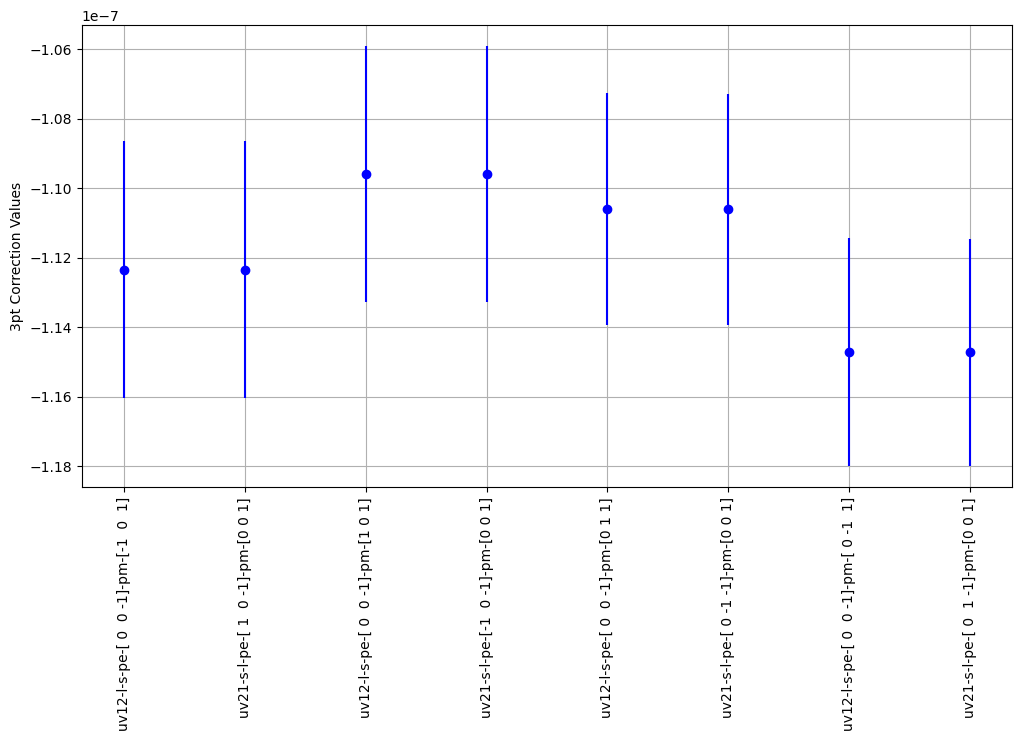

In [5]:
%matplotlib inline
i_te = 4
tau = 0
i_kh = 0
i_gk = 0
tau_e = range(tau_e_min,tau_e_max+tau_e_sep,tau_e_sep)[i_te]
tau_m = tau_e - tau
Lt = 64 

datalist = []
errolist = []
namelist = []
for i_p in range(4):
    for swap in range(2):
        adata = three_pt_data[i_te] [i_kh] [i_gk] [swap] [swap] [i_p] [swap] [swap]
        datalist.append((-1)**(float(swap))*np.mean(tb.Cut_conf(adata, Lt), 0)[tau_m,1])
        errolist.append(tb.Bootstrap_erro(tb.Bootstrap(tb.Cut_conf(adata,64),4,0),0)[tau_m,1])
        namelist.append(subsets[swap] [swap] [i_p] [swap] [swap])
        
plt.figure(figsize=(12, 6))
plt.ylabel('3pt Correction Values')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(True)
plt.errorbar(namelist, datalist, errolist, marker='o', linestyle='', color='blue')

plt.show()

$$The\;(tree-level)\;momentum-space\;HOPE\;formula\;should\;be$$
$$V_{ij,K^{\pm}}^{\mu\nu}(p,q)=-\frac{2if_{ij}\epsilon^{\mu\nu\alpha\beta}q_\alpha p_\beta}{\tilde{Q}^2}\sum_n \tilde{\omega}^n \xi^n$$
$$\tilde{\omega}(p,q)=2\frac{iE_K q_4+\mathbf{p}\cdot \mathbf{q}}{\tilde{Q^2}}$$
$$p=p_e-p_m$$
$$q=(p_e+p_m)/2$$
$$if\;\mathbf{p_e}=(0,0,-1)\;;\;\mathbf{p_m}=(\pm1,0,1)\;or\;\mathbf{p_m}=(0,\pm1,1)$$
$$\mathbf{p_3}=0$$

We can identify the following situations where a sign flip is necessary.
$$1.\;\;swap\;\mu\nu$$
$$2.\;\;sign\;flip\;of\;\mathbf{p_e}\;and\;\mathbf{p_m}$$

In [27]:
i_te = 1
i_kh = 0
i_gk = 0
tau_e = range(tau_e_min,tau_e_max+tau_e_sep,tau_e_sep)[i_te]

datalist = []
errolist = []
namelist = []
for i_inv, inv in enumerate([1,-1]):
    for i_sl, s_l in enumerate(kaon):
        for i_gh, g_h in enumerate(gamma_h):
            for i_p in range(4):
                for swap in range(1):
                    adata = three_pt_data[i_te] [i_kh] [i_gk] [i_gh] [i_sl] [i_p] [i_inv] [swap]
                    datalist.append((-1)**(float(i_gh))*(-1)**(float(swap))*-1*float(inv)*np.mean(tb.Cut_conf(adata, Lt), 0)[:,1])
                    errolist.append(tb.Bootstrap_erro(tb.Bootstrap(tb.Cut_conf(adata,64),4,0),0)[:,1])
                    namelist.append(subsets[i_gh] [i_sl] [i_p] [i_inv] [swap])

                     

In [26]:
%matplotlib auto
tb.Plot(datalist,errolist,Label=namelist,xshift=0.05,Xlabel='',Ylabel='')

Using matplotlib backend: TkAgg
